IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


[[-2.03473736e-01 -2.53277959e-02 -1.88835609e-02 ... -3.33870076e-02
   3.39201434e-02 -5.01659978e-02]
 [-6.59388065e-02  9.32373435e-03  7.70474876e-05 ... -3.78789689e-03
  -3.19873703e-02  2.16380536e-02]
 [-2.74078004e-02  1.05878369e-02 -6.77419126e-03 ... -2.15016629e-02
  -4.24747984e-02  5.32413431e-03]
 ...
 [-1.36056344e-02  2.08456316e-02 -4.30335242e-03 ...  6.07163058e-02
   1.89341481e-02  6.38277349e-02]
 [-4.09727994e-02  1.37759130e-02 -1.30854746e-02 ... -3.38900108e-02
  -7.74152603e-02 -8.90645466e-02]
 [ 1.61379746e-03  5.24564967e-03 -8.50826883e-03 ...  1.43348802e-02
   2.75495467e-03  1.27958634e-02]]
.values =
array([[-2.03473736e-01, -2.53277959e-02, -1.88835609e-02, ...,
        -3.33870076e-02,  3.39201434e-02, -5.01659978e-02],
       [-6.59388065e-02,  9.32373435e-03,  7.70474876e-05, ...,
        -3.78789689e-03, -3.19873703e-02,  2.16380536e-02],
       [-2.74078004e-02,  1.05878369e-02, -6.77419126e-03, ...,
        -2.15016629e-02, -4.24747984e-02, 

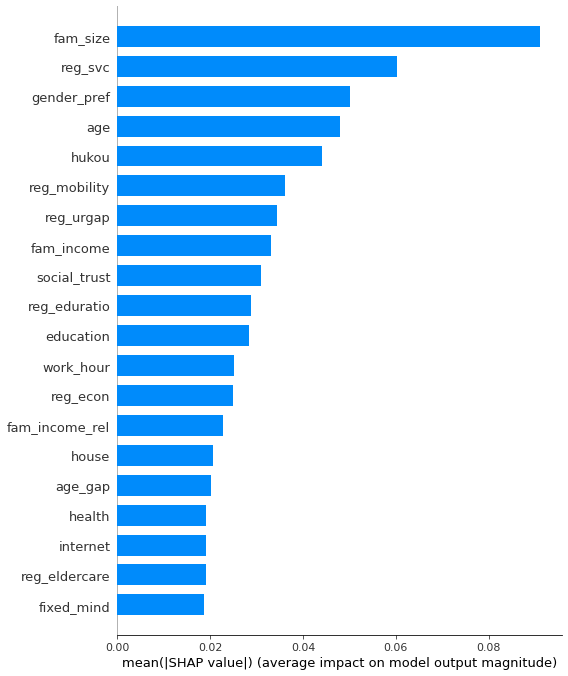

           feature  importance
0              age    0.047958
1           gender    0.017083
2            urban    0.008516
3            party    0.007179
4         fam_size    0.091171
5            hukou    0.044145
6            ethno    0.006632
7        education    0.028288
8          age_gap    0.020161
9          edu_gap    0.017041
10     gender_pref    0.050106
11     mar_satisfy    0.011870
12            work    0.008387
13       work_hour    0.025108
14       insurance    0.015545
15   care_from_par    0.005543
16    fin_from_par    0.005998
17         fin_par    0.011309
18        care_par    0.014539
19        internet    0.019106
20    social_trust    0.030947
21   social_status    0.010592
22      fixed_mind    0.018760
23     growth_mind    0.015957
24        religion    0.002450
25     gover_evalu    0.012789
26   reg_eldercare    0.018994
27   reg_childcare    0.018683
28          health    0.019185
29    reg_medicare    0.009492
30           house    0.020598
31      

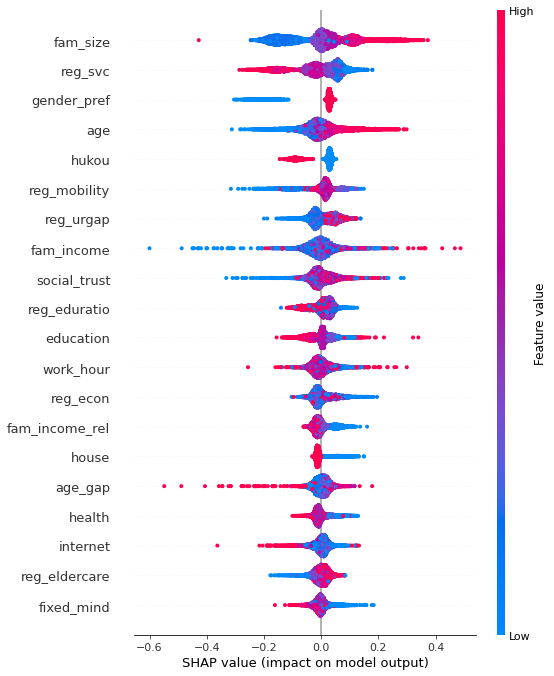

In [1]:
import numpy as np
import shap
import pandas
import matplotlib.pyplot as plt
from spsspro.algorithm import supervised_learning
#生成案例数据
data = pandas.read_csv("生育意愿数据20250301.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#catboost回归，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.catboost_regression(data_x=data_x, data_y=data_y)
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap_values2 = explainer(data_x)
print(shap_values)
print(shap_values2)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
plt.show()
#数值展示
feature_importance = pandas.DataFrame()

feature_importance['feature'] = data_x.columns

feature_importance['importance'] = np.abs(shap_values).mean(0)

feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="dot",show=False)
plt.savefig('catboost_all.png',dpi=600)

print(result)